# Problematic Internet Use | Part D : Severity Prediction using Machine Learning

In this part, we will be using Machine Learning techniques such as regression, decision trees, correlation features, etc. to answer the following question:

**Can we use HBN instruments to predict a child’s score on the problematic internet use scale, and if so, which features are most informative to the prediction?**

## Importing Dependencies

We will import all dependencies for this part of the project in the cell below.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import preprocessing
import statsmodels.api as sm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Data Preparation

Before we can go about training a model and feature importance, we need to prepare the data first. Let's review all of the features that are present within the dataset:

| Instrument                         | Field                          | Description                   |
|------------------------------------|--------------------------------|-------------------------------|
| Identifier | `id` | Participant's ID |
| Demographics | `Basic_Demos-Enroll_Season` | Season of enrollment |
| Demographics | `Basic_Demos-Age` | Age of participant |
| Demographics | `Basic_Demos-Sex` | Sex of participant |
| Children's Global Assessment Scale | `CGAS-Season` | Season of participation |
| Children's Global Assessment Scale | `CGAS-CGAS_Score` | Children's Global Assessment Scale Score |
| Physical Measures | `Physical-Season` | Season of participation |
| Physical Measures | `Physical-BMI` | Body Mass Index (kg/m^2) |
| Physical Measures | `Physical-Height` | Height (in) |
| Physical Measures | `Physical-Weight` | Weight (lbs) |
| Physical Measures | `Physical-Waist_Circumference` | Waist circumference (in) |
| Physical Measures | `Physical-Diastolic_BP` | Diastolic BP (mmHg) |
| Physical Measures | `Physical-HeartRate` | Heart rate (beats/min) |
| Physical Measures | `Physical-Systolic_BP` | Systolic BP (mmHg) |
| FitnessGram Vitals and Treadmill | `Fitness_Endurance-Season` | Season of participation |
| FitnessGram Vitals and Treadmill | `Fitness_Endurance-Max_Stage` | Maximum stage reached |
| FitnessGram Vitals and Treadmill | `Fitness_Endurance-Time_Mins` | Exact time completed: Minutes |
| FitnessGram Vitals and Treadmill | `Fitness_Endurance-Time_Sec` | Exact time completed: Seconds |
| FitnessGram Child | `FGC-Season` | Season of participation |
| FitnessGram Child | `FGC-FGC_CU` | Curl up total |
| FitnessGram Child | `FGC-FGC_CU_Zone` | Curl up fitness zone |
| FitnessGram Child | `FGC-FGC_GSND` | Grip Strength total (non-dominant) |
| FitnessGram Child | `FGC-FGC_GSND_Zone` | Grip Strength fitness zone (non-dominant) |
| FitnessGram Child | `FGC-FGC_GSD` | Grip Strength total (dominant) |
| FitnessGram Child | `FGC-FGC_GSD_Zone` | Grip Strength fitness zone (dominant) |
| FitnessGram Child | `FGC-FGC_PU` | Push-up total |
| FitnessGram Child | `FGC-FGC_PU_Zone` | Push-up fitness zone |
| FitnessGram Child | `FGC-FGC_SRL` | Sit & Reach total (left side) |
| FitnessGram Child | `FGC-FGC_SRL_Zone` | Sit & Reach fitness zone (left side) |
| FitnessGram Child | `FGC-FGC_SRR` | Sit & Reach total (right side) |
| FitnessGram Child | `FGC-FGC_SRR_Zone` | Sit & Reach fitness zone (right side) |
| FitnessGram Child | `FGC-FGC_TL` | Trunk lift total |
| FitnessGram Child | `FGC-FGC_TL_Zone` | Trunk lift fitness zone |
| Bio-electric Impedance Analysis | `BIA-Season` | Season of participation |
| Bio-electric Impedance Analysis | `BIA-BIA_Activity_Level_num` | Activity Level |
| Bio-electric Impedance Analysis | `BIA-BIA_BMC` | Bone Mineral Content |
| Bio-electric Impedance Analysis | `BIA-BIA_BMI` | Body Mass Index |
| Bio-electric Impedance Analysis | `BIA-BIA_BMR` | Basal Metabolic Rate |
| Bio-electric Impedance Analysis | `BIA-BIA_DEE` | Daily Energy Expenditure |
| Bio-electric Impedance Analysis | `BIA-BIA_ECW` | Extracellular Water |
| Bio-electric Impedance Analysis | `BIA-BIA_FFM` | Fat Free Mass |
| Bio-electric Impedance Analysis | `BIA-BIA_FFMI` | Fat Free Mass Index |
| Bio-electric Impedance Analysis | `BIA-BIA_FMI` | Fat Mass Index |
| Bio-electric Impedance Analysis | `BIA-BIA_Fat` | Body Fat Percentage |
| Bio-electric Impedance Analysis | `BIA-BIA_Frame_num` | Body Frame |
| Bio-electric Impedance Analysis | `BIA-BIA_ICW` | Intracellular Water |
| Bio-electric Impedance Analysis | `BIA-BIA_LDM` | Lean Dry Mass |
| Bio-electric Impedance Analysis | `BIA-BIA_LST` | Lean Soft Tissue |
| Bio-electric Impedance Analysis | `BIA-BIA_SMM` | Skeletal Muscle Mass |
| Bio-electric Impedance Analysis | `BIA-BIA_TBW` | Total Body Water |
| Physical Activity Questionnaire (Adolescents) | `PAQ_A-Season` | Season of participation |
| Physical Activity Questionnaire (Adolescents) | `PAQ_A-PAQ_A_Total` | Activity Summary Score (Adolescents) |
| Physical Activity Questionnaire (Children) | `PAQ_C-Season` | Season of participation |
| Physical Activity Questionnaire (Children) | `PAQ_C-PAQ_C_Total` | Activity Summary Score (Children) |
| Parent-Child Internet Addiction Test | `PCIAT-Season` | Season of participation |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_01` | How often does your child disobey time limits you set for online use? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_02` | How often does your child neglect household chores to spend more time online? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_03` | How often does your child prefer to spend time online rather than with the rest of your family? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_04` | How often does your child form new relationships with fellow online users? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_05` | How often do you complain about the amount of time your child spends online? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_06` | How often do your child's grades suffer because of the amount of time he or she spends online? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_07` | How often does your child check his or her e-mail before doing something else? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_08` | How often does your child seem withdrawn from others since discovering the Internet? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_09` | How often does your child become defensive or secretive when asked what he or she does online? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_10` | How often have you caught your child sneaking online against your wishes? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_11` | How often does your child spend time alone in his or her room playing on the computer? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_12` | How often does your child receive strange phone calls from new "online" friends? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_13` | How often does your child snap, yell, or act annoyed if bothered while online? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_14` | How often does your child seem more tired and fatigued than he or she did before the Internet came along? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_15` | How often does your child seem preoccupied with being back online when off-line? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_16` | How often does your child throw tantrums with your interference about how long he or she spends online? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_17` | How often does your child choose to spend time online rather than doing once enjoyed hobbies and/or outside interests? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_18` | How often does your child become angry or belligerent when your place time limits on how much time he or shes is allowed to spend online? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_19` | How often does your child choose to spend more time online than going out with friends? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_20` | How often does your child feel depressed, moody, or nervous when off-line which seems to go away once back online? |
| Parent-Child Internet Addiction Test | `PCIAT-PCIAT_Total` | Total Score |
| Sleep Disturbance Scale | `SDS-Season` | Season of participation |
| Sleep Disturbance Scale | `SDS-SDS_Total_Raw` | Total Raw Score |
| Sleep Disturbance Scale | `SDS-SDS_Total_T` | Total T-Score |
| Internet Use | `PreInt_EduHx-Season` | Season of participation |
| Internet Use | `PreInt_EduHx-computerinternet_hoursday` | Hours of using computer/internet |

Currently, there are all the `PCIAT` columns that record the fine-grained breakdown of the Parent-Child-Internet-Addiction-Test. Our dependent variable, the Severity Impairment Index (`sii`), is direclty determined by the these features, thus the `PCIAT` columns are dependent variables too and should be removed before proceeding.

Furthermore, there are metadata columns such as `id` and a lot of redundant columns as well that provide the same information such as all the season ones (`CGAS-Season`, `FGC-Season`, etc.), so let's remove them too save for the first one, that is `Basic_Demos-Enroll_Season`.

In [41]:
# Reading in the data
df = pd.read_csv('cleaned_data.csv', index_col=False)

# Dropping the necessary columns
columns_to_drop = [
    'id', 'BIA-Season', 'CGAS-Season', 'SDS-Season', 'PCIAT-Season', 
    'Physical-Season', 'FGC-Season', 'PreInt_EduHx-Season', 
    'Fitness_Endurance-Season','PAQ_C-Season', 
    'PCIAT-PCIAT_17', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_18', 
    'PCIAT-PCIAT_07', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_05', 
    'PCIAT-PCIAT_08', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_09', 
    'PCIAT-PCIAT_19', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_04', 
    'PCIAT-PCIAT_03', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_14', 
    'PCIAT-PCIAT_20', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_10', 
    'PCIAT-PCIAT_11', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_Total'
]
df = df.drop(columns=columns_to_drop)

Let's see how many categorical features we are left with now.

In [42]:
print(df.select_dtypes(include=['object']).columns)

Index(['Basic_Demos-Enroll_Season'], dtype='object')


We need to numerically represent the categorical seasonal feature before we can provide it as input to any machine learning model. For this purpose, we can use One-Hot Encoding, which is a widely used method where each category is converted into a binary (0/1) variable, creating a new column for each category. For example, for `Basic_Demos-Enroll_Season`:

| `Basic_Demos-Enroll_Season`   | spring | summer | autumn | winter |
|----------|--------|--------|--------|--------|
| spring   | 1      | 0      | 0      | 0      |
| summer   | 0      | 1      | 0      | 0      |
| autumn   | 0      | 0      | 1      | 0      |
| winter   | 0      | 0      | 0      | 1      |

In [43]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Basic_Demos-Enroll_Season'], drop_first=True, dtype=int)  # Set drop_first=True to avoid multicollinearity

# Preview of the dataset
display(df.head())

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,...,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,Basic_Demos-Enroll_Season_Spring,Basic_Demos-Enroll_Season_Summer,Basic_Demos-Enroll_Season_Winter
0,5,0,51.0,16.877316,46.0,50.8,68.0,81.0,114.0,5.0,...,19.5413,32.6909,2.550,39.0,55.0,3.0,2,0,0,0
1,9,0,65.0,14.035590,48.0,46.0,75.0,70.0,122.0,5.0,...,15.4107,27.0552,2.340,46.0,64.0,0.0,0,0,1,0
2,10,1,71.0,16.648696,56.5,75.6,65.0,94.0,117.0,5.0,...,27.1935,44.7213,2.170,38.0,54.0,2.0,0,0,1,0
3,9,0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,6.0,...,26.4798,45.9966,2.451,31.0,45.0,0.0,1,0,0,1
4,13,1,50.0,22.279952,59.5,112.2,60.0,73.0,102.0,5.0,...,35.3804,63.1265,4.110,40.0,56.0,0.0,1,1,0,0


## Logistic Regression

Let's review `sii` again. The target Variable `sii` is defined as:
- 0: None (`PCIAT-PCIAT_Total` from 0 to 30)
- 1: Mild (`PCIAT-PCIAT_Total` from 31 to 49)
- 2: Moderate (`PCIAT-PCIAT_Total` from 50 to 79)
- 3: Severe (`PCIAT-PCIAT_Total` 80 and more)

The variable `sii` is categorical, meaning it represents discrete categories rather than continuous numerical values. Furthermore, the relative difference between these categories is not uniform. For instance, the difference between 0 and 1 is not the same as the difference between 1 and 2 in terms of `PCIAT-PCIAT_Total`.

This ordinal yet non-uniform nature of `sii` makes it distinct from purely nominal variables (like "red", "green", "blue") or continuous variables (like height or temperature), requiring a modeling approach that respects this structure.

### Why Not Treat This as a Linear Regression Problem?

Linear regression models the relationship between independent variables (features) and a continuous dependent variable by fitting a straight line (or hyperplane in higher dimensions). However,

- Linear regression assumes the dependent variable has an interval scale, meaning the "distance" between categories is uniform. For `sii`, this assumption is not valid because the differences between consecutive categories are not guaranteed to be equal.
- Linear regression does not inherently consider the ordering of categories, treating them as arbitrary numerical values.
- It also predicts continous values, such as 2.5 instead of 2 or 3, resulting in higher loss values and making it difficult for the model to generalize.

### Why Logistic Regression is a Better Fit.

Logistic regression is designed to predict categorical outcomes by modeling the probability of each category as a function of the input features. It generalizes to multiclass variables like `sii` using techniques such as softmax regression, which outputs probabilities constrained to the range [0, 1]. In general,

$P(y = j) = \Large\frac{\exp(X\cdot\beta_j)}{\sum_k \exp(X\cdot\beta_k)}$

where $\beta_j$​ is the set of coefficients for class $j$. 

For any given input features, the probabilities of it belonging to every class are calculated and the highest probability determines the output prediction. Logistic Regression works well here because it handles categorical data naturally and outputs valid probability distributions that sum to 1, which can be used to train the model using loss functions such as cross-entropy loss.


### Why we will use a Random Forest Model.

While logistic regression provides a strong baseline model for classification, we will use a random forest model specifically. Random forest is an ensemble machine learning method that builds multiple decision trees during training and combines their outputs to make predictions. Each tree votes on the predicted class, and the forest selects the class with the most votes (for classification problems).

Advantages of using a random forest include:

- Nonlinear Relationships: Captures complex and nonlinear relationships between features and the target variable.
- Feature Importance: Provides insights into the relative importance of features in making predictions.
- Robustness: Resistant to overfitting due to bagging and randomization.
- Feature Handling: Handles a mix of categorical and numerical features without the need for extensive preprocessing (e.g., scaling).
- Robustness to Outliers: Are less sensitive to outliers than logistic regression.

## Model Fitting, Predictions and Evalaution

We shall now fit a random forest classifier and evalaute its accuracy (among other metrics) on the test dataset. Given the large size of our dataset, we shall use a 70-30 train-test split. First, we will use grid-search to find the best hyperparameters for the classifier.

Optimal n_estimators: 50
Optimal max_depth: 5
Optimal Accuracy: 0.6188


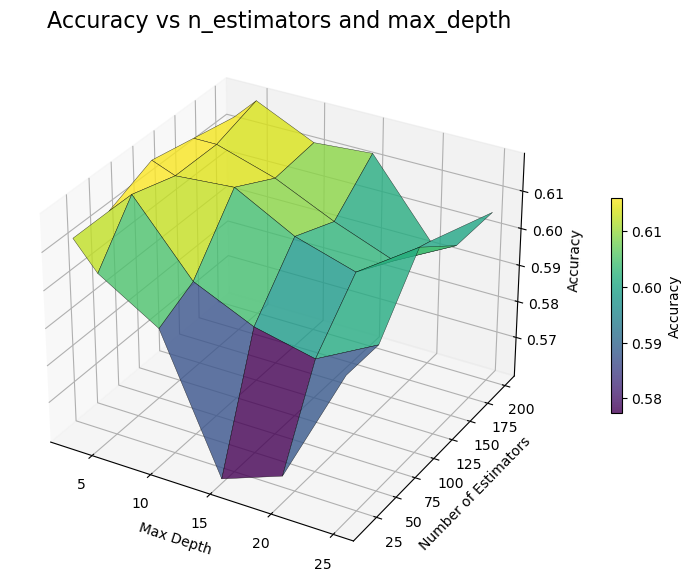

In [44]:
# Getting our input and output dataframes/series
X = df.drop(columns=['sii'])
y = df['sii']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using grid search to find the best hyperparameters for the Random Forest Classifier
n_estimators_range = [10, 50, 100, 150, 200]
max_depth_range = [3, 5, 10, 15, 20, 25]
accuracy_values = np.zeros((len(n_estimators_range), len(max_depth_range)))
for i, n_estimators in enumerate(n_estimators_range):
    for j, max_depth in enumerate(max_depth_range):
        forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        forest.fit(X_train, y_train)
        predictions = forest.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_values[i, j] = accuracy

max_accuracy_index = np.unravel_index(np.argmax(accuracy_values), accuracy_values.shape)
optimal_n_estimators = n_estimators_range[max_accuracy_index[0]]
optimal_max_depth = max_depth_range[max_accuracy_index[1]]
optimal_accuracy = accuracy_values[max_accuracy_index]
print(f"Optimal n_estimators: {optimal_n_estimators}")
print(f"Optimal max_depth: {optimal_max_depth}")
print(f"Optimal Accuracy: {optimal_accuracy:.4f}")

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(max_depth_range, n_estimators_range)
Z = accuracy_values
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, antialiased=True, edgecolor='k', linewidth=0.3)
ax.set_title('Accuracy vs n_estimators and max_depth', fontsize=16)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Estimators')
ax.set_zlabel('Accuracy')
fig.colorbar(surf, shrink=0.4, aspect=20, label='Accuracy', location='right', pad=0.08)
plt.show()

Now that we have found the best hyperparameters for this specific use-case, let's evaluate the outputs of our best performing classifier more closely.

Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       491
           1       0.41      0.23      0.29       209
           2       0.50      0.06      0.11       111
           3       0.00      0.00      0.00        10

    accuracy                           0.62       821
   macro avg       0.39      0.30      0.29       821
weighted avg       0.56      0.62      0.55       821



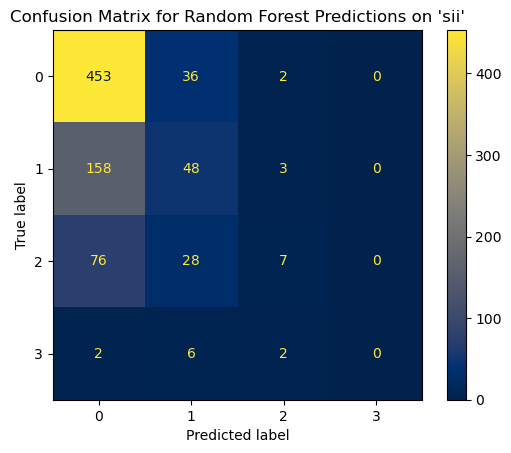

In [45]:
# Obtaining the best performing classifier again
forest = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions, zero_division=False))

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3])
disp.plot(cmap='cividis', values_format='d')
plt.title("Confusion Matrix for Random Forest Predictions on 'sii'")
plt.show()

While the accuracy is good, this is mainly because the dataset is heavily imbalanced towards the '0' class. The model more frequently predicts '0' due to this imbalance, thus it mostly gets the right predictions while struggling with the other classes. This is why precision, recall and thus the f1-score is so low on the other classes. 59.8% of the training data has the '0' class thus our current accuracy could even be obtained by predicting '0' no matter the input, showing that the model is not capable of differentiating between '0' and the other labels.

## Dealing with Imbalanced Data

To address these issues, we need to balance the data. Once we do that though, our model will not be a good model to be used in the real word, since testing in the real world is likely to comprise of imbalanced classes. In other words, our model will fit to a dataset that does not generalize to the distribution present in the real world. However, under a balanced dataset assumption, the random forest classifier will be able to differentiate classes better due to higher precision and recall, thus we can still use the balanced dataset to show the effectiveness of random forest as a modelling technique and for feature importance.

We will remove the '3' class entirely as there are almost no examples of it in our dataset.

Once that is done, we can use Over-sampling, which refers to the process of increasing the number of examples in the minority classes via simple random duplicate sampling until the number of samples in the all classes are comparable. Over-sampling works well here because we naturally have very few samples in the minority classes, so over-sampling would make sure the model has enough examples from the minority classes to learn meaningful patterns. Let's balance the dataset then find the optimal hyperparameters once again.

Optimal n_estimators: 200
Optimal max_depth: 25
Optimal Accuracy: 0.9050


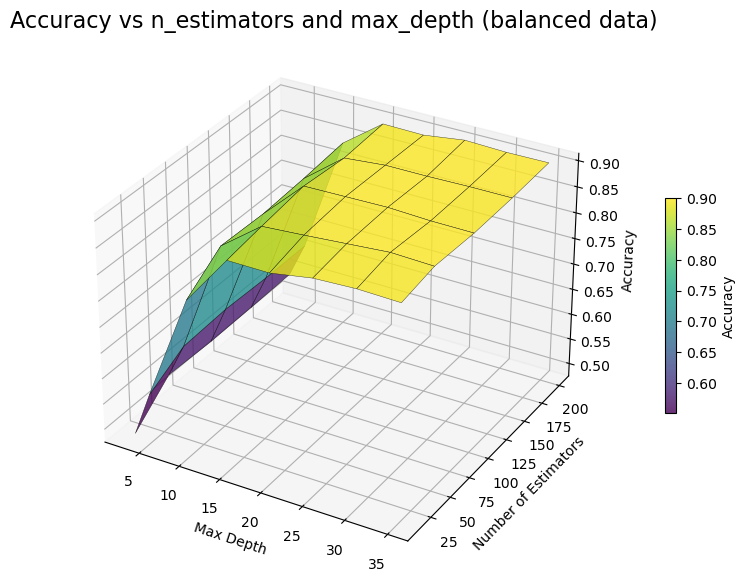

In [46]:
# Remove class 3 from the dataset
df_balanced = df[df['sii'] != 3]

# Separating features and target again
X = df_balanced.drop(columns=['sii'])
y = df_balanced['sii']

# Feature scaling via normalization
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Combine the features and target for balancing
data_balanced = pd.concat([X, y], axis=1)

# Balancing classes through oversampling (use .min() for undersampling)
# Find the size of the majority class
max_class_size = data_balanced['sii'].value_counts().max()

# Balancing each class
balanced_data = []
for label in data_balanced['sii'].unique():
    class_data = data_balanced[data_balanced['sii'] == label]
    balanced_data.append(resample(class_data, 
                                  replace=True,  # Oversample (use False for undersampling)
                                  n_samples=max_class_size, 
                                  random_state=42))
    
# Combine the balanced data
data_balanced = pd.concat(balanced_data)

# Separate features and target again
X = data_balanced.drop(columns=['sii'])
y = data_balanced['sii']

# Splitting the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using grid search to find the best hyperparameters for the Random Forest Classifier
n_estimators_range = [10, 50, 100, 150, 200]
max_depth_range = [3, 5, 10, 15, 20, 25, 30, 35]
accuracy_values = np.zeros((len(n_estimators_range), len(max_depth_range)))
for i, n_estimators in enumerate(n_estimators_range):
    for j, max_depth in enumerate(max_depth_range):
        forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        forest.fit(X_train, y_train)
        predictions = forest.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_values[i, j] = accuracy

max_accuracy_index = np.unravel_index(np.argmax(accuracy_values), accuracy_values.shape)
optimal_n_estimators = n_estimators_range[max_accuracy_index[0]]
optimal_max_depth = max_depth_range[max_accuracy_index[1]]
optimal_accuracy = accuracy_values[max_accuracy_index]
print(f"Optimal n_estimators: {optimal_n_estimators}")
print(f"Optimal max_depth: {optimal_max_depth}")
print(f"Optimal Accuracy: {optimal_accuracy:.4f}")

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(max_depth_range, n_estimators_range)
Z = accuracy_values
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, antialiased=True, edgecolor='k', linewidth=0.3)
ax.set_title('Accuracy vs n_estimators and max_depth (balanced data)', fontsize=16)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Estimators')
ax.set_zlabel('Accuracy')
fig.colorbar(surf, shrink=0.4, aspect=20, label='Accuracy', location='right', pad=0.08)
plt.show()

Now that we have found the best hyperparameters for this specific use-case, let's evaluate the outputs of our best performing classifier more closely.

Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       464
           1       0.88      0.88      0.88       470
           2       0.94      0.96      0.95       498

    accuracy                           0.91      1432
   macro avg       0.90      0.90      0.90      1432
weighted avg       0.90      0.91      0.90      1432



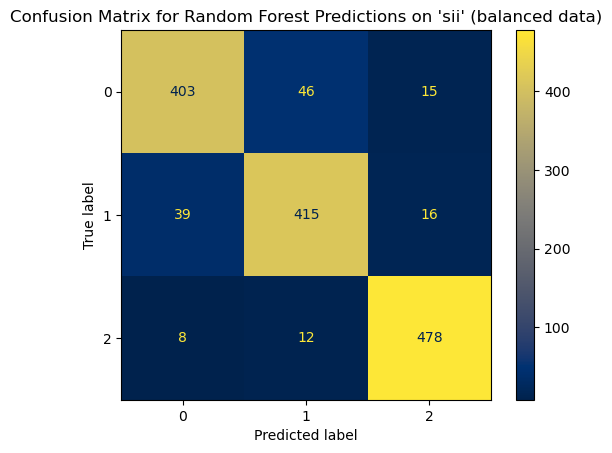

In [48]:
# Obtaining the best performing classifier again
forest = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions, zero_division=False))

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2])
disp.plot(cmap='cividis', values_format='d')
plt.title("Confusion Matrix for Random Forest Predictions on 'sii' (balanced data)")
plt.show()

We can see that under the balanced dataset assumption, the random forest classifier performs much better. Not only has the accuracy improved, but the precision, recall and f1-scores for all classes are much better, showing that the model is much better at differentiating between the classes and minimizing false positives and negatives rather than just predicting '0' all the time.

## Feature Importance

Understanding which features contribute the most to a machine learning model's predictions helps, identifying key factors influencing the target variable, simplifying models by eliminating less important features (dimensionality reduction), provide interpretability, aiding domain experts in decision-making. In this section, we will aim to determine the features in our dataset that are least informative to our predictions, and remove them so that we can train a smaller but almost as accurate model.

### Mean Decrease in Impurity

Another reason why we used a random forest classifier is because they can directly be used to measure feature importance via Mean Decrease in Impurity (MDI):

- Impurity refers to how mixed the target variable classes are at a node in a decision tree. A split reduces impurity by separating classes.
- MDI calculates the total decrease in impurity for each feature across all trees in the forest. Features that contribute to more significant reductions in impurity are deemed more important.

Let's use MDI to determine the most informative features.

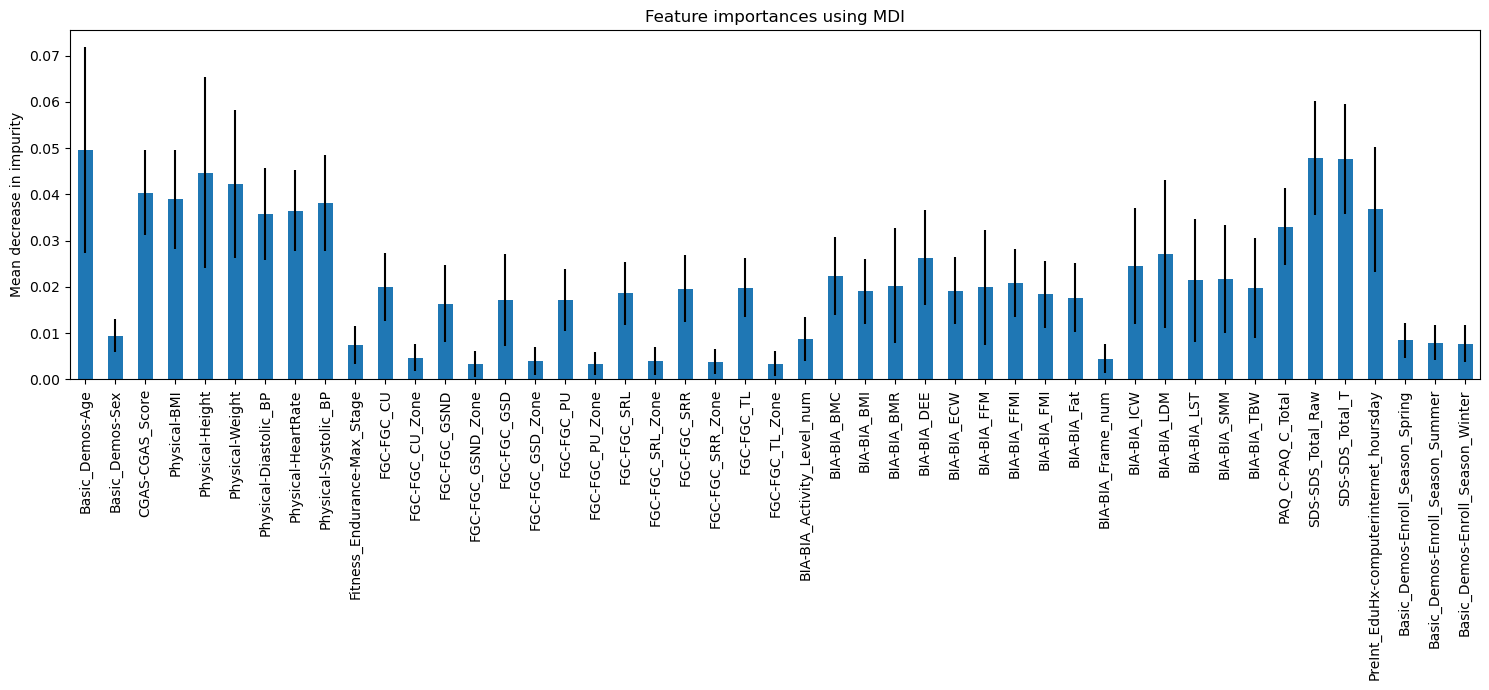

In [49]:
# Calculating feature importances
feature_names = forest.feature_names_in_
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

# Plotting the feature importances
fig, ax = plt.subplots(figsize=(15, 7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We can use a simple threshold to filter out the least predictive features and then fit the random forest again.

Original number of features: 47
Number of features after thresholding: 20

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       464
           1       0.87      0.88      0.87       470
           2       0.93      0.95      0.94       498

    accuracy                           0.90      1432
   macro avg       0.90      0.90      0.90      1432
weighted avg       0.90      0.90      0.90      1432



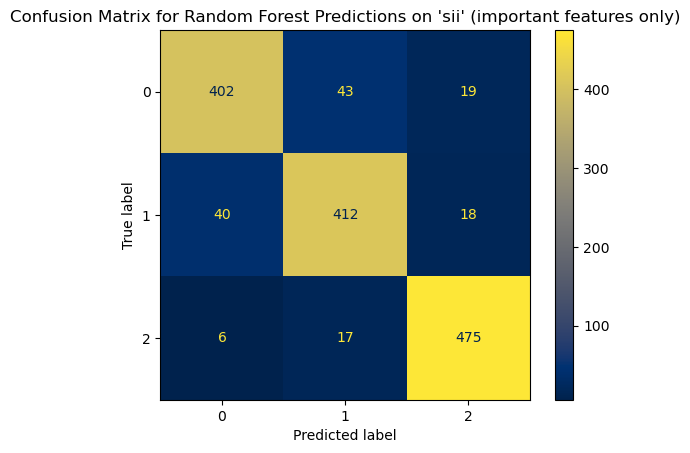

In [51]:
# Finding the important features via thresholding
threshold = 0.02
print("Original number of features:", len(forest_importances))
important_features = forest_importances[forest_importances > threshold].index.to_list()
print("Number of features after thresholding:", len(important_features))

# Removing the unimportant features from our input dataframes
X_train = X_train[important_features]
X_test = X_test[important_features]

# Obtaining the best performing classifier again
forest = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Evaluate the model
print("")
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions, zero_division=False))

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2])
disp.plot(cmap='cividis', values_format='d')
plt.title("Confusion Matrix for Random Forest Predictions on 'sii' (important features only)")
plt.show()

As we can see, we removed a total of 27 features entirely yet our overall accuracy and f1-score is nearly equal to the accuracy and f1-score we got from fitting the random forest over all the features, highlighting how not all features are necessarily providing any meaningful information to our model.

## Cross Validation

Lastly, we can perform 5-fold cross validation over our training data to gain confidence in our model's ability to generalize to unseen data.

In [52]:
# Obtaining the best performing classifier again
forest = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
cv_scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='accuracy')

# Output the results
print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

5-Fold Cross-Validation Accuracy Scores: [0.87892377 0.85329341 0.85628743 0.85179641 0.8502994 ]
Mean Accuracy: 0.8581200827045461
Standard Deviation: 0.010588678637020616


Our accuracy on the testing set was 0.90, while the mean accuracy here is 0.86. Since the testing accuracy is a little higher, it's possible that the test set did not fully represent the overall data distribution by being slightly easier than the training data subsets used during cross-validation. Nonetheless, the accuracy is good regardless and most important of all, stable across the different folds, implying that the random forest model is reliable and performs similarly on different subsets of the data.

__This marks the end of Part D: Severity Prediction using Machine Learning.__